This file uses different trained models to make predictions on dataset of quark and gluon images


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('drive')

Mounted at drive


import the trained models

In [ ]:
from tensorflow import keras
model_path = '/content/drive/MyDrive/colab_notebooks/trained_models/cnn_simple/' # Model trained with standard jets
chg_path   = '/content/drive/MyDrive/colab_notebooks/trained_models/cnn_simple_chg/' # Model trained with charged particle jets
model_10_path = '/content/drive/MyDrive/colab_notebooks/trained_models/cnn10k_1/' # Model trained with 10K standard images per set
# Load the model
loaded_model = keras.models.load_model(model_path)
loaded_chg_model = keras.models.load_model(chg_path)
loaded_10_model = keras.models.load_model(model_10_path)

Load the labeled data for testing the predicting power of the model

In [ ]:
# Load test data for testing the model
test_datagen = ImageDataGenerator(rescale = 1./255.)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/data/test_set',
    target_size = (33, 33),
    class_mode = 'binary',
    shuffle = False
)

chg_test_datagen = ImageDataGenerator(rescale = 1./255.)
chg_test_set = chg_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/charged_data/validation_set',
    target_size = (33, 33),
    class_mode = 'binary',
    shuffle = False
)

Found 2068 images belonging to 2 classes.
Found 2036 images belonging to 2 classes.


In [ ]:
# Make predictions
real_y = test_set.labels
pred_y = loaded_model.predict(test_set)

chg_real_y = chg_test_set.labels
chg_pred_y = loaded_model.predict(chg_test_set)

pred_10_y =  loaded_10_model.predict(test_set)

65/65 [==============================] - 55s 840ms/step


In [ ]:
#for i in range(len(pred_y)):
  #print(i,pred_y[i], real_y[i])

Plot the ROC curve (this is a test of the efficiency of the trained model on the test images)

In [ ]:
from sklearn.metrics import roc_curve, auc
# Convert pred_y into an array
predictions = pred_y[:,0]
chg_predictions = chg_pred_y[:, 0]
pred_10 = pred_10_y[:,0]

# Compute parameters for ROC curve
fpr, tpr, trashold = roc_curve(real_y, predictions)
roc_auc = auc(fpr, tpr)

c_fpr, c_tpr, c_fprtrashold = roc_curve(chg_real_y, chg_pred_y)
c_roc_auc = auc(c_fpr, c_tpr)

fpr_10, tpr_10, trashold_10 = roc_curve(real_y, pred_10)
roc_auc_10 = auc(fpr_10, tpr_10)

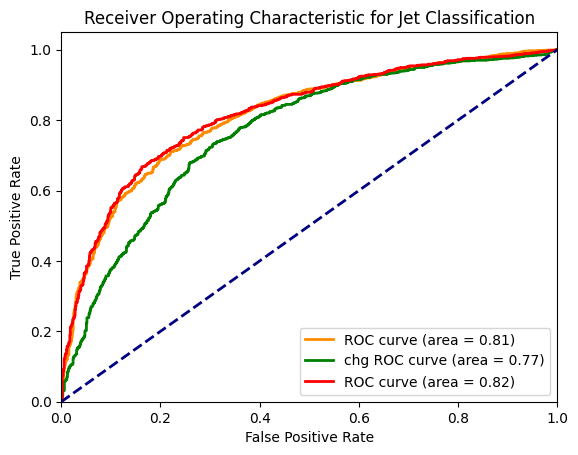

In [ ]:
# Plot the roc and get auce
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(c_fpr, c_tpr, color='green', lw=2, label='chg ROC curve (area = %0.2f)' % c_roc_auc)
plt.plot(fpr_10, tpr_10, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_10)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Jet Classification')
plt.legend(loc="lower right")
plt.show()